In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Javiera_Research')

In [ ]:
!ls

 cleaned_data  'General presentation.gslides'   notebooks


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

# list of variables

* `df_1yr`
  * dataframe containing 74 columns
    * 71 columns of interest, 
    * plus 1 column of patient `eid` and 
    * 2 columns that indicates the time lapse between the 2 questinnaires and the date of attending assessment center
  * contains all samples who have done both questionnaires within 6 months of attending the assessment center
  * did not clean out any `Null` or negative values 

* `df_1yr_float`
  * `df_1yr` but only with columns who are of `float64` as their `dtype`



* `1yr_missing_value_df`
  * dataframe containing the percentage of missing values in `df_1yr` for each feature 

* `df_og`
  * the original dataframe with all the samples, but only the 72 columns of interest

# load cleaned data

In [ ]:
# df_1yr = pd.read_csv('cleaned_data/ukb43673_74cols_1yr.csv')
df_1yr = pd.read_csv('cleaned_data/ukb43673_61cols_1yr.csv')
df_1yr

,eid,31-0.0,53-2.0,53-3.0,20400-0.0,20458-0.0,20459-0.0,20460-0.0,20479-0.0,20485-0.0,20494-0.0,20495-0.0,20496-0.0,20497-0.0,20498-0.0,20505-0.0,20506-0.0,20507-0.0,20508-0.0,20509-0.0,20510-0.0,20511-0.0,20512-0.0,20513-0.0,20514-0.0,20515-0.0,20516-0.0,20517-0.0,20518-0.0,20519-0.0,20520-0.0,21003-2.0,21003-3.0,21023-0.0,21025-0.0,21033-0.0,21034-0.0,21039-0.0,21040-0.0,21041-0.0,21042-0.0,21043-0.0,21044-0.0,21048-0.0,21049-0.0,21050-0.0,21051-0.0,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21057-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0,center2_time_lapse1,center2_time_lapse2,center3_time_lapse1,center3_time_lapse2
0,1000993,1.0,2017-06-21,2019-10-14,2016-07-28,2.0,2.0,4.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,59.0,62.0,2017-04-11,0.0,-500.0,-501.0,NaN,1.0,0.0,3.0,5.0,1.0,-600.0,-600.0,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-601.0,-601.0,328 days,71 days,1173 days,916 days
1,1001367,1.0,2017-08-16,NaN,2016-09-30,2.0,2.0,4.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,78.0,NaN,2017-08-24,4.0,-503.0,-501.0,NaN,8.0,0.0,1.0,7.0,1.0,-600.0,-600.0,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,320 days,-8 days,NaN,NaN
2,1003110,1.0,2016-05-25,NaN,2016-08-18,2.0,3.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,64.0,NaN,2017-04-28,0.0,-500.0,-501.0,NaN,1.0,0.0,2.0,6.0,1.0,-600.0,-602.0,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-85 days,-338 days,NaN,NaN
3,1003668,1.0,2017-02-15,2019-10-08,2016-09-13,3.0,3.0,-121.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,54.0,57.0,2017-05-11,3.0,-501.0,-501.0,NaN,3.0,1.0,1.0,3.0,1.0,-601.0,-601.0,NaN,-601.0,-601.0,-600.0,-600.0,-601.0,-600.0,-601.0,-600.0,-600.0,-600.0,-601.0,155 days,-85 days,1120 days,880 days
4,1003823,1.0,2016-05-31,NaN,2016-08-24,2.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,59.0,NaN,2017-05-05,0.0,-501.0,-500.0,NaN,1.0,2.0,2.0,3.0,1.0,-600.0,-601.0,NaN,-601.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-601.0,-85 days,-339 days,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,6021110,1.0,2016-07-25,NaN,2016-08-19,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0,NaN,2017-05-04,1.0,-500.0,-500.0,NaN,1.0,0.0,3.0,1.0,2.0,-600.0,-601.0,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-313.0,-600.0,-600.0,-600.0,-600.0,-25 days,-283 days,NaN,NaN
6283,6022430,1.0,2016-12-18,NaN,2016-12-12,1.0,2.0,5.0,1.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.0,NaN,2017-04-28,0.0,-500.0,-500.0,NaN,2.0,0.0,2.0,7.0,1.0,-600.0,-601.0,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-602.0,-600.0,-600.0,-601.0,6 days,-131 days,NaN,NaN
6284,6022902,1.0,2017-09-09,NaN,2016-09-22,2.0,2.0,4.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.0,NaN,2017-05-20,5.0,-501.0,-501.0,NaN,2.0,5.0,2.0,3.0,1.0,-600.0,-601.0,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,352 days,112 days,NaN,NaN
6285,6023768,0.0,2017-06-18,NaN,2016-08-17,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,57.0,NaN,2017-04-26,5.0,-500.0,-501.0,10.0,10.0,8.0,2.0,7.0,1.0,-601.0,-600.0,-313.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-601.0,305 days,53 days,NaN,NaN


# look into into age

age has the feature ID `21003-2.0`

## 1 year data

In [ ]:
df_1yr['21003-2.0'].isnull().sum()
# our age columns does not have any missing values

0

Text(0, 0.5, 'count')

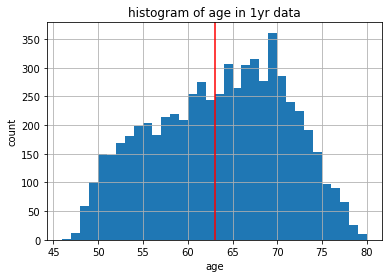

In [ ]:
df_1yr['21003-2.0'].hist(bins=int(max(df_1yr['21003-2.0']) - min(df_1yr['21003-2.0'])))
  # make a bin for each integer age
plt.title('histogram of age in 1yr data')
plt.axvline(x=np.mean(df_1yr['21003-2.0']), color = "red")
plt.xlabel('age')
plt.ylabel('count')

## entire data

In [ ]:
# to get the age distribution from the entire dataset (the smaller one with only 72 features we are interested in)

In [ ]:
# notebook saved on Greene cluster 

# look into into sex

age has the feature ID `31-0.0`

## 1 year data

In [ ]:
df_1yr['31-0.0'].isnull().sum()
# our sex columns contains missing values

0

Text(0, 0.5, 'count')

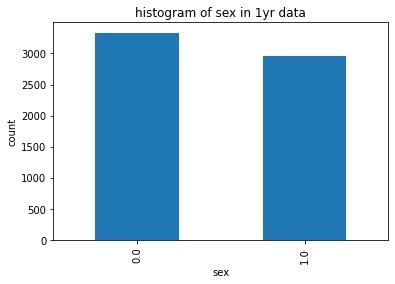

In [ ]:
df_1yr['31-0.0'].value_counts().plot(kind='bar')
plt.title('histogram of sex in 1yr data')
# plt.axvline(x=np.mean(df_1yr['21003-2.0']), color = "red")
plt.xlabel('sex')
plt.ylabel('count')

## entire data

In [ ]:
# to get the age distribution from the entire dataset (the smaller one with only 72 features we are interested in)

In [ ]:
# notebook saved on Greene cluster 

# look into missing data

In [ ]:
df_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eid                  6287 non-null   int64  
 1   31-0.0               6287 non-null   float64
 2   53-2.0               6287 non-null   object 
 3   53-3.0               1520 non-null   object 
 4   20400-0.0            6287 non-null   object 
 5   20458-0.0            6286 non-null   float64
 6   20459-0.0            6286 non-null   float64
 7   20460-0.0            6286 non-null   float64
 8   20479-0.0            6286 non-null   float64
 9   20485-0.0            6286 non-null   float64
 10  20494-0.0            2685 non-null   float64
 11  20495-0.0            6286 non-null   float64
 12  20496-0.0            2685 non-null   float64
 13  20497-0.0            6286 non-null   float64
 14  20498-0.0            6286 non-null   float64
 15  20505-0.0            6286 non-null   f

In [ ]:
# from the above, column 21039-0.0 only has 1352 non-null values
# it corresponds to Severity of current abdominal distension/tightness

In [ ]:
df_1yr['21039-0.0']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
6282     NaN
6283     NaN
6284     NaN
6285    10.0
6286     NaN
Name: 21039-0.0, Length: 6287, dtype: float64

In [ ]:
df_1yr.isnull().sum()

eid                       0
31-0.0                    0
53-2.0                    0
53-3.0                 4767
20400-0.0                 0
                       ... 
21061-0.0                 0
center2_time_lapse1       0
center2_time_lapse2       0
center3_time_lapse1    4767
center3_time_lapse2    4767
Length: 61, dtype: int64

In [ ]:
# look at the fraction of null values overall
print("percent of missing values over all:", 
      (df_1yr.isnull().sum().sum())/(len(df_1yr) * len(df_1yr.columns))*100)

percent of missing values over all: 8.914309256415137


In [ ]:
# look at the fraction of null values for each column
num_missing = df_1yr.isnull().sum()
percent_missing = (df_1yr.isnull().sum())/len(df_1yr)*100
missing_value_df = pd.DataFrame({'column_name': df_1yr.columns,
                                 'number_missing': num_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,number_missing,percent_missing
eid,eid,0,0.000000
31-0.0,31-0.0,0,0.000000
53-2.0,53-2.0,0,0.000000
53-3.0,53-3.0,4767,75.823127
20400-0.0,20400-0.0,0,0.000000
...,...,...,...
21061-0.0,21061-0.0,0,0.000000
center2_time_lapse1,center2_time_lapse1,0,0.000000
center2_time_lapse2,center2_time_lapse2,0,0.000000
center3_time_lapse1,center3_time_lapse1,4767,75.823127


In [ ]:
# sort to see which columns have the most missing values
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(50)

,column_name,number_missing,percent_missing
21039-0.0,21039-0.0,4935,78.495308
center3_time_lapse2,center3_time_lapse2,4767,75.823127
center3_time_lapse1,center3_time_lapse1,4767,75.823127
53-3.0,53-3.0,4767,75.823127
21003-3.0,21003-3.0,4767,75.823127
20494-0.0,20494-0.0,3602,57.292826
20496-0.0,20496-0.0,3602,57.292826
21050-0.0,21050-0.0,2956,47.017655
20515-0.0,20515-0.0,1,0.015906
20511-0.0,20511-0.0,1,0.015906


In [ ]:
!ls

 cleaned_data  'General presentation.gslides'   notebooks


In [ ]:
# save the missing values dataframe
# missing_value_df.to_csv("cleaned_data/1yr_missing_value_df.csv", index = False)

## look into unique values of top 10 missing value columns

In [ ]:
# missing_value_df.sort_values('percent_missing', ascending=False, inplace = True)
missing_value_df

,column_name,number_missing,percent_missing
21039-0.0,21039-0.0,4935,78.495308
center3_time_lapse2,center3_time_lapse2,4767,75.823127
center3_time_lapse1,center3_time_lapse1,4767,75.823127
53-3.0,53-3.0,4767,75.823127
21003-3.0,21003-3.0,4767,75.823127
...,...,...,...
21025-0.0,21025-0.0,0,0.000000
21023-0.0,21023-0.0,0,0.000000
21003-2.0,21003-2.0,0,0.000000
31-0.0,31-0.0,0,0.000000


In [ ]:
top_10_missing = list(missing_value_df.index[:10])

# see the top 10 missing value columns
df_1yr.loc[:,top_10_missing]

,21039-0.0,center3_time_lapse2,center3_time_lapse1,53-3.0,21003-3.0,20494-0.0,20496-0.0,21050-0.0,20515-0.0,20511-0.0
0,NaN,916 days,1173 days,2019-10-14,62.0,NaN,NaN,NaN,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2.0,1.0
3,NaN,880 days,1120 days,2019-10-08,57.0,0.0,0.0,NaN,1.0,2.0
4,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6282,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,1.0
6283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
6284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
6285,10.0,NaN,NaN,NaN,NaN,0.0,1.0,-313.0,1.0,1.0


In [ ]:
unique = []
for col in top_10_missing:
  unique.append(df_1yr[col].unique())

top_10_missing_unique=pd.DataFrame({'column_name': top_10_missing,
                                    'unique_values': unique})

In [ ]:
top_10_missing_unique['num_unique'] = (top_10_missing_unique['unique_values']).apply(lambda x: len(x))
top_10_missing_unique

,column_name,unique_values,num_unique
0,21039-0.0,"[nan, 3.0, 2.0, 4.0, 5.0, 6.0, 1.0, 7.0, 9.0, ...",13
1,center3_time_lapse2,"[916 days, nan, 880 days, 952 days, 796 days, ...",296
2,center3_time_lapse1,"[1173 days, nan, 1120 days, 952 days, 894 days...",347
3,53-3.0,"[2019-10-14, nan, 2019-10-08, 2019-12-03, 2019...",258
4,21003-3.0,"[62.0, nan, 57.0, 55.0, 59.0, 67.0, 66.0, 69.0...",34
5,20494-0.0,"[nan, 1.0, 0.0, 2.0, -818.0, 4.0, 3.0]",7
6,20496-0.0,"[nan, 0.0, 1.0, 2.0, 3.0, 4.0, -818.0]",7
7,21050-0.0,"[nan, -601.0, -600.0, -313.0, -602.0, -818.0]",6
8,20515-0.0,"[1.0, 2.0, 4.0, 3.0, -818.0, nan]",6
9,20511-0.0,"[1.0, 2.0, 4.0, 3.0, -818.0, nan]",6


In [ ]:
# top_10_missing_unique.to_csv("cleaned_data/1yr_top10_missing_unique_df.csv", index = False)

In [ ]:
top_10_missing_unique.iloc[0,1]

array([  nan,    3.,    2.,    4.,    5.,    6.,    1.,    7.,    9.,
          8.,   10.,    0., -818.])

# look into negative data

In [ ]:
# just by eye, we can see that we get a lot of negative values
# some -602, some -602, some -121, etc.
# but if we look into some of the columns, obviously the negative number does not make sense
# plan: mannually look into each column to determine if negative values make sense for this column or not
# then treat all negative values like missing values and filter them out

In [ ]:
df_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eid                  6287 non-null   int64  
 1   31-0.0               6287 non-null   float64
 2   53-2.0               6287 non-null   object 
 3   53-3.0               1520 non-null   object 
 4   20400-0.0            6287 non-null   object 
 5   20458-0.0            6286 non-null   float64
 6   20459-0.0            6286 non-null   float64
 7   20460-0.0            6286 non-null   float64
 8   20479-0.0            6286 non-null   float64
 9   20485-0.0            6286 non-null   float64
 10  20494-0.0            2685 non-null   float64
 11  20495-0.0            6286 non-null   float64
 12  20496-0.0            2685 non-null   float64
 13  20497-0.0            6286 non-null   float64
 14  20498-0.0            6286 non-null   float64
 15  20505-0.0            6286 non-null   f

In [ ]:
# grab only the columns with type float
# gets rid of the 4 date columns + 4 time lapse columns, and the eid column
df_1yr.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 52 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   31-0.0     6287 non-null   float64
 1   20458-0.0  6286 non-null   float64
 2   20459-0.0  6286 non-null   float64
 3   20460-0.0  6286 non-null   float64
 4   20479-0.0  6286 non-null   float64
 5   20485-0.0  6286 non-null   float64
 6   20494-0.0  2685 non-null   float64
 7   20495-0.0  6286 non-null   float64
 8   20496-0.0  2685 non-null   float64
 9   20497-0.0  6286 non-null   float64
 10  20498-0.0  6286 non-null   float64
 11  20505-0.0  6286 non-null   float64
 12  20506-0.0  6286 non-null   float64
 13  20507-0.0  6286 non-null   float64
 14  20508-0.0  6286 non-null   float64
 15  20509-0.0  6286 non-null   float64
 16  20510-0.0  6286 non-null   float64
 17  20511-0.0  6286 non-null   float64
 18  20512-0.0  6286 non-null   float64
 19  20513-0.0  6286 non-null   float64
 20  20514-0.

In [ ]:
df_1yr_float = df_1yr.select_dtypes(include=['float64'])

In [ ]:
# calculate the sum of 1's (true negatives) and the percentage of them
number_negative = (df_1yr_float < 0).sum()
percent_negative = ((df_1yr_float < 0).sum())/len(df_1yr)*100
negative_value_df = pd.DataFrame({'column_name': df_1yr_float.columns,
                                  'number_negative' : number_negative,
                                  'percent_negative': percent_negative})
negative_value_df

,column_name,number_negative,percent_negative
31-0.0,31-0.0,0,0.000000
20458-0.0,20458-0.0,25,0.397646
20459-0.0,20459-0.0,10,0.159058
20460-0.0,20460-0.0,127,2.020041
20479-0.0,20479-0.0,34,0.540798
20485-0.0,20485-0.0,21,0.334023
20494-0.0,20494-0.0,5,0.079529
20495-0.0,20495-0.0,6,0.095435
20496-0.0,20496-0.0,5,0.079529
20497-0.0,20497-0.0,6,0.095435


In [ ]:
negative_value_df.sort_values('percent_negative', ascending = False, inplace=True)
negative_value_df.head(20)
  # all else have less than 10% negative value

,column_name,number_negative,percent_negative
21061-0.0,21061-0.0,6287,100.000000
21056-0.0,21056-0.0,6287,100.000000
21048-0.0,21048-0.0,6287,100.000000
21049-0.0,21049-0.0,6287,100.000000
21051-0.0,21051-0.0,6287,100.000000
21033-0.0,21033-0.0,6287,100.000000
21053-0.0,21053-0.0,6287,100.000000
21054-0.0,21054-0.0,6287,100.000000
21055-0.0,21055-0.0,6287,100.000000
21052-0.0,21052-0.0,6287,100.000000


In [ ]:
# save the negative value dataframes
# negative_value_df.to_csv("cleaned_data/1yr_negative_value_df.csv", index = False)

In [ ]:
# look into the unique values for a top negative value column
df_1yr['21061-0.0'].unique()

array([-601., -600., -602., -818.])

## look into unique values of top 20 negative value columns

In [ ]:
negative_value_df

,column_name,number_negative,percent_negative
21061-0.0,21061-0.0,6287,100.000000
21056-0.0,21056-0.0,6287,100.000000
21048-0.0,21048-0.0,6287,100.000000
21049-0.0,21049-0.0,6287,100.000000
21051-0.0,21051-0.0,6287,100.000000
21033-0.0,21033-0.0,6287,100.000000
21053-0.0,21053-0.0,6287,100.000000
21054-0.0,21054-0.0,6287,100.000000
21055-0.0,21055-0.0,6287,100.000000
21052-0.0,21052-0.0,6287,100.000000


In [ ]:
top_20_neg = list(negative_value_df.index[:20])

# see the top 20 negative value columns
df_1yr.loc[:,top_20_neg]

,21061-0.0,21056-0.0,21048-0.0,21049-0.0,21051-0.0,21033-0.0,21053-0.0,21054-0.0,21055-0.0,21052-0.0,21057-0.0,21059-0.0,21060-0.0,21034-0.0,21058-0.0,21050-0.0,20460-0.0,21044-0.0,20513-0.0,21043-0.0
0,-601.0,-600.0,-600.0,-600.0,-600.0,-500.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-501.0,-601.0,NaN,4.0,1.0,1.0,5.0
1,-600.0,-600.0,-600.0,-600.0,-600.0,-503.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-600.0,NaN,4.0,1.0,1.0,7.0
2,-601.0,-600.0,-600.0,-602.0,-600.0,-500.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-600.0,NaN,3.0,1.0,1.0,6.0
3,-601.0,-600.0,-601.0,-601.0,-601.0,-501.0,-600.0,-600.0,-601.0,-601.0,-601.0,-600.0,-600.0,-501.0,-600.0,NaN,-121.0,1.0,1.0,3.0
4,-601.0,-600.0,-600.0,-601.0,-601.0,-501.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-601.0,-500.0,-600.0,NaN,4.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,-600.0,-600.0,-600.0,-601.0,-600.0,-500.0,-600.0,-600.0,-600.0,-600.0,-313.0,-600.0,-600.0,-500.0,-600.0,NaN,3.0,2.0,1.0,1.0
6283,-601.0,-600.0,-600.0,-601.0,-600.0,-500.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-500.0,-602.0,NaN,5.0,1.0,1.0,7.0
6284,-600.0,-600.0,-600.0,-601.0,-600.0,-501.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-601.0,NaN,4.0,1.0,1.0,3.0
6285,-601.0,-600.0,-601.0,-600.0,-601.0,-500.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-501.0,-600.0,-313.0,4.0,1.0,1.0,7.0


In [ ]:
unique = []
for col in top_20_neg:
  unique.append(df_1yr[col].unique())

top_20_neg_unique=pd.DataFrame({'column_name': top_20_neg,
                                'unique_values': unique})

In [ ]:
top_20_neg_unique['num_unique'] = (top_20_neg_unique['unique_values']).apply(lambda x: len(x))
top_20_neg_unique

,column_name,unique_values,num_unique
0,21061-0.0,"[-601.0, -600.0, -602.0, -818.0]",4
1,21056-0.0,"[-600.0, -601.0, -602.0]",3
2,21048-0.0,"[-600.0, -601.0, -602.0]",3
3,21049-0.0,"[-600.0, -602.0, -601.0]",3
4,21051-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
5,21033-0.0,"[-500.0, -503.0, -501.0, -502.0, -504.0, -818.0]",6
6,21053-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
7,21054-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
8,21055-0.0,"[-600.0, -601.0, -602.0]",3
9,21052-0.0,"[-600.0, -601.0, -602.0, -818.0]",4


In [ ]:
# top_20_neg_unique.to_csv("cleaned_data/1yr_top20_neg_unique_df.csv", index = False)

# Clean missing data

## delete columns with `>50%` missing data

In [ ]:
missing_value_df[missing_value_df['percent_missing']>=50]

,column_name,number_missing,percent_missing
21039-0.0,21039-0.0,4935,78.495308
center3_time_lapse2,center3_time_lapse2,4767,75.823127
center3_time_lapse1,center3_time_lapse1,4767,75.823127
53-3.0,53-3.0,4767,75.823127
21003-3.0,21003-3.0,4767,75.823127
20494-0.0,20494-0.0,3602,57.292826
20496-0.0,20496-0.0,3602,57.292826


In [ ]:
# 4 of the above columns are relating to attending center 3
# ignore those for now

In [ ]:
cols_to_delete = list(missing_value_df[missing_value_df['percent_missing']>=50]['column_name'])
cols_to_delete

['21039-0.0',
 'center3_time_lapse2',
 'center3_time_lapse1',
 '53-3.0',
 '21003-3.0',
 '20494-0.0',
 '20496-0.0']

In [ ]:
# save to text file for record keeping
with open("cleaned_data/cols_deleted.txt", "w") as f:
    for s in cols_to_delete:
        f.write(str(s) +"\n")

In [ ]:
df_1yr_fil = df_1yr.drop(columns=cols_to_delete)
print(df_1yr.shape)
print(df_1yr_fil.shape)

(6287, 61)
(6287, 53)


## columns with '>47%' missing value

how many rows do we have with no missing values in any of its columns, can we just use those?

In [ ]:
# look at the fraction of null values for each column after filtering
percent_missing = (df_1yr_fil.isnull().sum())/len(df_1yr_fil)*100
missing_value_df_fil = pd.DataFrame({'column_name': df_1yr_fil.columns,
                                     'percent_missing': percent_missing})
missing_value_df_fil

,column_name,percent_missing
eid,eid,0.000000
31-0.0,31-0.0,0.000000
53-2.0,53-2.0,0.000000
20400-0.0,20400-0.0,0.000000
20458-0.0,20458-0.0,0.015906
20459-0.0,20459-0.0,0.015906
20460-0.0,20460-0.0,0.015906
20479-0.0,20479-0.0,0.015906
20485-0.0,20485-0.0,0.015906
20495-0.0,20495-0.0,0.015906


In [ ]:
# sort to see which columns have the most missing values
missing_value_df_fil.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df_fil.head(10)

,column_name,percent_missing
20519-0.0,20519-0.0,0.015906
20507-0.0,20507-0.0,0.015906
20520-0.0,20520-0.0,0.015906
20518-0.0,20518-0.0,0.015906
20517-0.0,20517-0.0,0.015906
20516-0.0,20516-0.0,0.015906
20515-0.0,20515-0.0,0.015906
20514-0.0,20514-0.0,0.015906
20513-0.0,20513-0.0,0.015906
20511-0.0,20511-0.0,0.015906


In [ ]:
df_1yr_fil['21050-0.0'].unique()

KeyError: ignored

### test1: delete those columns and see what we have left

In [ ]:
cols_to_delete_test1 = list(missing_value_df_fil[missing_value_df_fil['percent_missing']>=47]['column_name'])
cols_to_delete_test1

[]

In [ ]:
# # append to text file for record keeping
# with open("cleaned_data/cols_deleted.txt", "a") as f:
#     for s in cols_to_delete:
#         f.write(str(s) +"\n")

In [ ]:
df_1yr_fil_test1 = df_1yr_fil.drop(columns=cols_to_delete_test1)
print(df_1yr.shape)
print(df_1yr_fil.shape)
print(df_1yr_fil_test1.shape)

(6287, 61)
(6287, 53)
(6287, 53)


see how many samples we have left with no misisng data at all

In [ ]:
# a list of rows containing missing value or not
rows = df_1yr_fil_test1.isnull().any(axis=1)

# negate that to get rows that don't contain missing values
df_1yr_fil_test1[~(rows)].shape

(6286, 53)

### test2: fillin `-818` for those columns and see what we have left

In [ ]:
cols_to_fill_test2 = list(missing_value_df_fil[missing_value_df_fil['percent_missing']>=47]['column_name'])
cols_to_fill_test2

['21050-0.0']

In [ ]:
# # save to text file for record keeping
# with open("cleaned_data/cols_deleted.txt", "w") as f:
#     for s in cols_to_delete:
#         f.write(str(s) +"\n")

In [ ]:
df_1yr_fil_test2 = df_1yr_fil.copy()
df_1yr_fil_test2.loc[:,cols_to_fill_test2] = df_1yr_fil_test2.loc[:,cols_to_fill_test2].fillna(-818.0)
print(df_1yr.shape)
print(df_1yr_fil.shape)
print(df_1yr_fil_test2.shape)

(6287, 61)
(6287, 54)
(6287, 54)


see how many samples we have left with no misisng data at all

In [ ]:
# a list of rows containing missing value or not
rows = df_1yr_fil_test2.isnull().any(axis=1)

# negate that to get rows that don't contain missing values
df_1yr_fil_test2[~(rows)].shape

(6286, 54)

### since it is highly inaccurate to assume missing values are `-818`. We will proceed with test1

In [ ]:
# a list of rows containing missing value or not
rows = df_1yr_fil_test1.isnull().any(axis=1)

# negate that to get rows that don't contain missing values

df_1yr_fil = df_1yr_fil_test1[~(rows)]

print(df_1yr_fil.isnull().sum().sum())
print(df_1yr_fil.shape)

0
(6286, 53)


In [ ]:
cols_to_delete.extend(cols_to_delete_test1)
cols_to_delete

['21039-0.0',
 'center3_time_lapse2',
 'center3_time_lapse1',
 '53-3.0',
 '21003-3.0',
 '20494-0.0',
 '20496-0.0',
 '21050-0.0']

In [ ]:
# save to text file for record keeping
with open("cleaned_data/cols_deleted.txt", "w") as f:
    for s in cols_to_delete:
        f.write(str(s) +"\n")

# Clean negative data for numerical columns

In [ ]:
df_1yr_fil.shape

(6286, 53)

In [ ]:
# gets rid of the 3 date columns + 2 time lapse columns + 1 eid column
df_1yr_fil_float = df_1yr_fil.select_dtypes(include=['float64'])
df_1yr_fil_float.shape

(6286, 47)

In [ ]:
# calculate the sum of 1's (trues) and the percentage of them
number_negative = (df_1yr_fil_float < 0).sum()
percent_negative = ((df_1yr_fil_float < 0).sum())/len(df_1yr_fil)*100
negative_value_df_fil = pd.DataFrame({'column_name': df_1yr_fil_float.columns,
                                      'number_negative' : number_negative,
                                      'percent_negative': percent_negative})

negative_value_df_fil.sort_values('percent_negative', ascending = False, inplace=True)
negative_value_df_fil.head(10)
  # all else have less than 10% negative value

,column_name,number_negative,percent_negative
21061-0.0,21061-0.0,6286,100.0
21058-0.0,21058-0.0,6286,100.0
21049-0.0,21049-0.0,6286,100.0
21048-0.0,21048-0.0,6286,100.0
21034-0.0,21034-0.0,6286,100.0
21033-0.0,21033-0.0,6286,100.0
21053-0.0,21053-0.0,6286,100.0
21054-0.0,21054-0.0,6286,100.0
21055-0.0,21055-0.0,6286,100.0
21052-0.0,21052-0.0,6286,100.0


In [ ]:
!ls cleaned_data/

Codings.csv		      og_columns.txt
cols_deleted.txt	      ukb43673_57cols.csv
df_cluster_encoded.csv	      ukb43673_61cols_1yr.csv
fil_1yr_53cols_pos_all.csv    ukb43673_72cols.csv
fil_1yr_53cols_pos_mixed.csv  ukb43673_74cols_1yr.csv
fil_1yr_64cols_pos_mixed.csv  ukb43673_74cols_6mo.csv
fil_1yr_66cols_pos_mixed.csv  ukb43673_76cols_1yr.csv
fil_columns.txt		      ukb_response_impute_ref_stats_group_ds3.csv
javie_filtered_cols.csv


In [ ]:
# load javi csv to get a list of the data types for each column
# categorical or integer
meta_df = pd.read_csv('cleaned_data/javie_filtered_cols.csv')
meta_df_cols = meta_df[['UDI','type']]
meta_df_cols

,UDI,type
0,21044-0.0,numerical
1,21048-0.0,ordinal
2,21052-0.0,ordinal
3,21053-0.0,ordinal
4,21054-0.0,ordinal
5,21055-0.0,ordinal
6,21060-0.0,ordinal
7,21051-0.0,ordinal
8,21050-0.0,ordinal
9,21059-0.0,ordinal


In [ ]:
# because we mannually added two 2 columns to this list, add them to the df
# other columns we added do not need to be considered anyways
i = len(meta_df_cols)
meta_df_cols.loc[i] = ['21003-2.0', 'numerical']
  # age for center 2
meta_df_cols.loc[i+1] = ['31-0.0', 'ordinal']
  # sex

meta_df_cols

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,UDI,type
0,21044-0.0,numerical
1,21048-0.0,ordinal
2,21052-0.0,ordinal
3,21053-0.0,ordinal
4,21054-0.0,ordinal
5,21055-0.0,ordinal
6,21060-0.0,ordinal
7,21051-0.0,ordinal
8,21050-0.0,ordinal
9,21059-0.0,ordinal


In [ ]:
negative_value_df_fil = negative_value_df_fil.merge(meta_df_cols,
                                                    left_on='column_name',
                                                    right_on='UDI',
                                                    how='left')
negative_value_df_fil

,column_name,number_negative,percent_negative,UDI,type
0,21061-0.0,6286,100.000000,21061-0.0,ordinal
1,21058-0.0,6286,100.000000,21058-0.0,ordinal
2,21049-0.0,6286,100.000000,21049-0.0,ordinal
3,21048-0.0,6286,100.000000,21048-0.0,ordinal
4,21034-0.0,6286,100.000000,21034-0.0,ordinal
5,21033-0.0,6286,100.000000,21033-0.0,ordinal
6,21053-0.0,6286,100.000000,21053-0.0,ordinal
7,21054-0.0,6286,100.000000,21054-0.0,ordinal
8,21055-0.0,6286,100.000000,21055-0.0,ordinal
9,21052-0.0,6286,100.000000,21052-0.0,ordinal


In [ ]:
# for categorical, we can just use Sklearn.ordinal_encoder
# grab the list of columns that have type numerical, those are numbers mixed with -818 class
negative_value_df_fil[negative_value_df_fil['type']=='numerical']

,column_name,number_negative,percent_negative,UDI,type
16,21044-0.0,40,0.636335,21044-0.0,numerical
18,21043-0.0,36,0.572701,21043-0.0,numerical
25,21040-0.0,21,0.334076,21040-0.0,numerical
26,21042-0.0,20,0.318167,21042-0.0,numerical
45,21003-2.0,0,0.000000,21003-2.0,numerical


In [ ]:
mixed_cols = list(negative_value_df_fil[negative_value_df_fil['type']=='numerical']['column_name'])
mixed_cols

['21044-0.0', '21043-0.0', '21040-0.0', '21042-0.0', '21003-2.0']

In [ ]:
df_1yr_fil_mixed = df_1yr_fil[mixed_cols]
df_1yr_fil_mixed

,21044-0.0,21043-0.0,21040-0.0,21042-0.0,21003-2.0
0,1.0,5.0,1.0,3.0,59.0
1,1.0,7.0,8.0,1.0,78.0
2,1.0,6.0,1.0,2.0,64.0
3,1.0,3.0,3.0,1.0,54.0
4,1.0,3.0,1.0,2.0,59.0
...,...,...,...,...,...
6282,2.0,1.0,1.0,3.0,54.0
6283,1.0,7.0,2.0,2.0,61.0
6284,1.0,3.0,2.0,2.0,61.0
6285,1.0,7.0,10.0,2.0,57.0


In [ ]:
# grab the non-negative boolean row masks
# this indicates if all feature values in a row are non-negative
(df_1yr_fil_mixed>=0).all(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
6282    True
6283    True
6284    True
6285    True
6286    True
Length: 6286, dtype: bool

In [ ]:
# see the rows we have deleted, the rows that contains at least 1 negative feature
df_1yr_fil_mixed[(df_1yr_fil_mixed<0).any(axis=1)]

,21044-0.0,21043-0.0,21040-0.0,21042-0.0,21003-2.0
26,-818.0,-818.0,7.0,-818.0,69.0
61,1.0,-818.0,0.0,1.0,54.0
102,-818.0,2.0,9.0,1.0,73.0
115,-818.0,-818.0,5.0,-818.0,72.0
121,2.0,7.0,-818.0,5.0,74.0
...,...,...,...,...,...
6048,-818.0,4.0,5.0,1.0,68.0
6157,1.0,4.0,-818.0,3.0,68.0
6158,2.0,15.0,-818.0,3.0,71.0
6194,-818.0,3.0,2.0,1.0,75.0


In [ ]:
# keep only rows with no negative number in any of teh mixed columns
df_1yr_fil_mixed[(df_1yr_fil_mixed>=0).all(axis=1)]

,21044-0.0,21043-0.0,21040-0.0,21042-0.0,21003-2.0
0,1.0,5.0,1.0,3.0,59.0
1,1.0,7.0,8.0,1.0,78.0
2,1.0,6.0,1.0,2.0,64.0
3,1.0,3.0,3.0,1.0,54.0
4,1.0,3.0,1.0,2.0,59.0
...,...,...,...,...,...
6282,2.0,1.0,1.0,3.0,54.0
6283,1.0,7.0,2.0,2.0,61.0
6284,1.0,3.0,2.0,2.0,61.0
6285,1.0,7.0,10.0,2.0,57.0


In [ ]:
df_1yr_fil.shape

(6286, 53)

In [ ]:
df_1yr_fil = df_1yr_fil[(df_1yr_fil_mixed>=0).all(axis=1)]
# this deleted all columns with >48% missing data
# then deleted rows that have any missing data 
# then deleted rows that have any negative value (no answer class) in a numerical column

In [ ]:
df_1yr_fil.shape

(6192, 53)

In [ ]:
df_1yr_fil.to_csv('cleaned_data/fil_1yr_53cols_pos_mixed.csv', index=False)

In [ ]:
# fil_cols = list(df_1yr_fil.columns)

# # save to text file for record keeping
# with open("cleaned_data/fil_nonneg_columns.txt", "w") as f:
#     for s in fil_cols:
#         f.write(str(s) +"\n")

# Clean negative data for ordinal columns

Depending on the encoding, classes like `prefer not to answer` and `do not know` could have values anywhere from `-818` to `-3` to evern positive `3`.

So, in order to filter those out, we need to know the encoding for our columns.

In [ ]:
df_1yr_fil.shape

(6192, 53)

In [ ]:
# gets rid of the 3 date columns + 2 time lapse columns + the 1 eid column
df_1yr_fil_float = df_1yr_fil.select_dtypes(include=['float64'])
df_1yr_fil_float.shape

(6192, 47)

In [ ]:
# calculate the sum of 1's (trues) and the percentage of them
number_negative = (df_1yr_fil_float < 0).sum()
percent_negative = ((df_1yr_fil_float < 0).sum())/len(df_1yr_fil)*100
negative_value_df_fil = pd.DataFrame({'column_name': df_1yr_fil_float.columns,
                                      'number_negative' : number_negative,
                                      'percent_negative': percent_negative})
negative_value_df_fil.head()

,column_name,number_negative,percent_negative
31-0.0,31-0.0,0,0.000000
20458-0.0,20458-0.0,22,0.355297
20459-0.0,20459-0.0,10,0.161499
20460-0.0,20460-0.0,123,1.986434
20479-0.0,20479-0.0,33,0.532946


In [ ]:
negative_value_df_fil.sort_values('percent_negative', ascending = False, inplace=True)
negative_value_df_fil.head(10)
  # all else have less than 10% negative value

,column_name,number_negative,percent_negative
21061-0.0,21061-0.0,6192,100.0
21055-0.0,21055-0.0,6192,100.0
21060-0.0,21060-0.0,6192,100.0
21059-0.0,21059-0.0,6192,100.0
21049-0.0,21049-0.0,6192,100.0
21058-0.0,21058-0.0,6192,100.0
21048-0.0,21048-0.0,6192,100.0
21056-0.0,21056-0.0,6192,100.0
21057-0.0,21057-0.0,6192,100.0
21054-0.0,21054-0.0,6192,100.0


In [ ]:
!ls cleaned_data/

Codings.csv		      og_columns.txt
cols_deleted.txt	      ukb43673_57cols.csv
df_cluster_encoded.csv	      ukb43673_61cols_1yr.csv
fil_1yr_53cols_pos_all.csv    ukb43673_72cols.csv
fil_1yr_53cols_pos_mixed.csv  ukb43673_74cols_1yr.csv
fil_1yr_64cols_pos_mixed.csv  ukb43673_74cols_6mo.csv
fil_1yr_66cols_pos_mixed.csv  ukb43673_76cols_1yr.csv
fil_columns.txt		      ukb_response_impute_ref_stats_group_ds3.csv
javie_filtered_cols.csv


In [ ]:
# load javi csv to get a list of the data types for each column
# categorical or integer
meta_df = pd.read_csv('cleaned_data/javie_filtered_cols.csv')
meta_df_cols = meta_df[['UDI','type','Coding']]
meta_df_cols

,UDI,type,Coding
0,21044-0.0,numerical,584
1,21048-0.0,ordinal,339
2,21052-0.0,ordinal,339
3,21053-0.0,ordinal,339
4,21054-0.0,ordinal,339
5,21055-0.0,ordinal,339
6,21060-0.0,ordinal,339
7,21051-0.0,ordinal,339
8,21050-0.0,ordinal,339
9,21059-0.0,ordinal,339


In [ ]:
# because we mannually added two 2 columns to this list, add them to the df
# other columns we added do not need to be considered anyways
# but here, these columns do not need to be considered either because they have no encoding

# i = len(meta_df_cols)
# meta_df_cols.loc[i] = ['21003-2.0', 'numerical']
#   # age for center 2
# meta_df_cols.loc[i+1] = ['31-0.0', 'numerical']
#   # sex

# meta_df_cols

In [ ]:
negative_value_df_fil = negative_value_df_fil.merge(meta_df_cols,
                                                    left_on='column_name',
                                                    right_on='UDI',
                                                    how='left')
negative_value_df_fil

,column_name,number_negative,percent_negative,UDI,type,Coding
0,21061-0.0,6192,100.000000,21061-0.0,ordinal,339.0
1,21055-0.0,6192,100.000000,21055-0.0,ordinal,339.0
2,21060-0.0,6192,100.000000,21060-0.0,ordinal,339.0
3,21059-0.0,6192,100.000000,21059-0.0,ordinal,339.0
4,21049-0.0,6192,100.000000,21049-0.0,ordinal,339.0
5,21058-0.0,6192,100.000000,21058-0.0,ordinal,339.0
6,21048-0.0,6192,100.000000,21048-0.0,ordinal,339.0
7,21056-0.0,6192,100.000000,21056-0.0,ordinal,339.0
8,21057-0.0,6192,100.000000,21057-0.0,ordinal,1018.0
9,21054-0.0,6192,100.000000,21054-0.0,ordinal,339.0


In [ ]:
# for categorical, we can just use Sklearn.ordinal_encoder
# grab the list of columns that have type numerical, those are numbers mixed with -818 class
negative_value_df_fil[negative_value_df_fil['type']=='ordinal']

,column_name,number_negative,percent_negative,UDI,type,Coding
0,21061-0.0,6192,100.000000,21061-0.0,ordinal,339.0
1,21055-0.0,6192,100.000000,21055-0.0,ordinal,339.0
2,21060-0.0,6192,100.000000,21060-0.0,ordinal,339.0
3,21059-0.0,6192,100.000000,21059-0.0,ordinal,339.0
4,21049-0.0,6192,100.000000,21049-0.0,ordinal,339.0
5,21058-0.0,6192,100.000000,21058-0.0,ordinal,339.0
6,21048-0.0,6192,100.000000,21048-0.0,ordinal,339.0
7,21056-0.0,6192,100.000000,21056-0.0,ordinal,339.0
8,21057-0.0,6192,100.000000,21057-0.0,ordinal,1018.0
9,21054-0.0,6192,100.000000,21054-0.0,ordinal,339.0


In [ ]:
# get a list of all ordinal column feature names in our dataset
ord_cols = list(negative_value_df_fil[negative_value_df_fil['type']=='ordinal']['column_name'])
# ord_cols

In [ ]:
df_1yr_fil_ord = df_1yr_fil[ord_cols]
df_1yr_fil_ord.head()

,21061-0.0,21055-0.0,21060-0.0,21059-0.0,21049-0.0,21058-0.0,21048-0.0,21056-0.0,21057-0.0,21054-0.0,21053-0.0,21033-0.0,21034-0.0,21052-0.0,21051-0.0,20460-0.0,20513-0.0,20479-0.0,20505-0.0,20458-0.0,20485-0.0,20512-0.0,20507-0.0,20520-0.0,20509-0.0,20510-0.0,20515-0.0,20506-0.0,20517-0.0,20516-0.0,20459-0.0,20498-0.0,20519-0.0,20514-0.0,20495-0.0,20497-0.0,20518-0.0,20511-0.0,20508-0.0,21025-0.0
0,-601.0,-600.0,-601.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-500.0,-501.0,-600.0,-600.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-503.0,-501.0,-600.0,-600.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0
2,-601.0,-600.0,-600.0,-600.0,-602.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-500.0,-501.0,-600.0,-600.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-601.0,-601.0,-600.0,-600.0,-601.0,-600.0,-601.0,-600.0,-601.0,-600.0,-600.0,-501.0,-501.0,-601.0,-601.0,-121.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,1.0,3.0
4,-601.0,-600.0,-601.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-500.0,-601.0,-601.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0


In [ ]:
# get a list of all codings present for our ordinal features
ord_codings = list(negative_value_df_fil[negative_value_df_fil['type']=='ordinal']['Coding'].unique())
ord_codings

[339.0, 1018.0, 950.0, 538.0, 504.0, 535.0, 537.0, 534.0, 871.0]

In [ ]:
# change all to integers to match with coding_df later
for i in range(len(ord_codings)):
  ord_codings[i] = int(ord_codings[i])

ord_codings

[339, 1018, 950, 538, 504, 535, 537, 534, 871]

In [ ]:
coding_df = pd.read_csv('cleaned_data/Codings.csv', 
                        encoding = 'ISO-8859-1')

In [ ]:
coding_df.head()

,Coding,Value,Meaning
0,1,1,Yes
1,2,0,Other job (free text entry)
2,2,1,Managers and Senior Officials
3,2,11,Corporate Managers
4,2,111,Corporate Managers And Senior Officials


In [ ]:
coding_df.dtypes

Coding      int64
Value      object
Meaning    object
dtype: object

In [ ]:
# keep only codgins that are present in our dataframes
mask = coding_df['Coding'].isin(ord_codings)
coding_df = coding_df[mask]
coding_df

,Coding,Value,Meaning
90886,339,-600,Not bothered at all
90887,339,-601,Bothered a little
90888,339,-602,Bothered a lot
90889,339,-818,Prefer not to answer
92026,504,-818,Prefer not to answer
92027,504,1,Not at all
92028,504,2,Several days
92029,504,3,More than half the days
92030,504,4,Nearly every day
92159,534,-818,Prefer not to answer


In [ ]:
neg_lst = ['Prefer not to answer', 'Do not know']
coding_df[coding_df['Meaning'].isin(neg_lst)]['Value'].unique()

array(['-818', '-121'], dtype=object)

So we have just confirmed that the only values in our ordinal features that could correspond to the values we want to filter out is `-818` and `-121`. We don't have those weird `1` or `2` as `prefer not to answers`, which means we do not need to filter by coding but can filter overall. 

In [ ]:
# grab the non-'neg' boolean row masks for ordinal features only
# this indicates if any feature values in a row are prefer not to answer or do not know
mask = (df_1yr_fil_ord==-818.0).any(axis=1) | (df_1yr_fil_ord==-121.0).any(axis=1)
mask

0       False
1       False
2       False
3        True
4       False
        ...  
6282    False
6283    False
6284    False
6285    False
6286    False
Length: 6192, dtype: bool

In [ ]:
# see the rows we will delete, the rows that contains at least 1 'neg' value for ordinal features
df_1yr_fil_ord[mask]

,21061-0.0,21055-0.0,21060-0.0,21059-0.0,21049-0.0,21058-0.0,21048-0.0,21056-0.0,21057-0.0,21054-0.0,21053-0.0,21033-0.0,21034-0.0,21052-0.0,21051-0.0,20460-0.0,20513-0.0,20479-0.0,20505-0.0,20458-0.0,20485-0.0,20512-0.0,20507-0.0,20520-0.0,20509-0.0,20510-0.0,20515-0.0,20506-0.0,20517-0.0,20516-0.0,20459-0.0,20498-0.0,20519-0.0,20514-0.0,20495-0.0,20497-0.0,20518-0.0,20511-0.0,20508-0.0,21025-0.0
3,-601.0,-601.0,-600.0,-600.0,-601.0,-600.0,-601.0,-600.0,-601.0,-600.0,-600.0,-501.0,-501.0,-601.0,-601.0,-121.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,1.0,3.0
44,-600.0,-600.0,-601.0,-600.0,-601.0,-601.0,-602.0,-600.0,-818.0,-600.0,-600.0,-501.0,-501.0,-600.0,-600.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,-818.0,-818.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0
55,-602.0,-601.0,-601.0,-601.0,-600.0,-600.0,-600.0,-602.0,-818.0,-600.0,-600.0,-501.0,-501.0,-600.0,-600.0,2.0,1.0,2.0,1.0,4.0,0.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0
70,-600.0,-600.0,-601.0,-600.0,-601.0,-600.0,-601.0,-601.0,-313.0,-600.0,-600.0,-501.0,-500.0,-600.0,-600.0,4.0,1.0,0.0,-818.0,3.0,0.0,-818.0,1.0,4.0,-818.0,2.0,4.0,-818.0,-818.0,4.0,3.0,1.0,4.0,2.0,3.0,0.0,1.0,1.0,2.0,1.0
111,-601.0,-601.0,-601.0,-600.0,-602.0,-600.0,-600.0,-601.0,-313.0,-600.0,-600.0,-500.0,-501.0,-600.0,-601.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,-818.0,-818.0,1.0,-818.0,-818.0,1.0,-818.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,-600.0,-600.0,-601.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-500.0,-502.0,-600.0,-600.0,-818.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
6259,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-602.0,-600.0,-818.0,-600.0,-600.0,-501.0,-500.0,-600.0,-601.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0,0.0
6264,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-500.0,-501.0,-600.0,-600.0,-121.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0
6267,-602.0,-600.0,-601.0,-600.0,-601.0,-601.0,-601.0,-601.0,-313.0,-600.0,-601.0,-501.0,-501.0,-600.0,-602.0,4.0,1.0,1.0,2.0,3.0,0.0,1.0,-818.0,2.0,2.0,-818.0,2.0,2.0,3.0,1.0,3.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0


In [ ]:
# keep only rows with no 'negative' number in any of the ordinal columns
df_1yr_fil_ord[~mask]

,21061-0.0,21055-0.0,21060-0.0,21059-0.0,21049-0.0,21058-0.0,21048-0.0,21056-0.0,21057-0.0,21054-0.0,21053-0.0,21033-0.0,21034-0.0,21052-0.0,21051-0.0,20460-0.0,20513-0.0,20479-0.0,20505-0.0,20458-0.0,20485-0.0,20512-0.0,20507-0.0,20520-0.0,20509-0.0,20510-0.0,20515-0.0,20506-0.0,20517-0.0,20516-0.0,20459-0.0,20498-0.0,20519-0.0,20514-0.0,20495-0.0,20497-0.0,20518-0.0,20511-0.0,20508-0.0,21025-0.0
0,-601.0,-600.0,-601.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-500.0,-501.0,-600.0,-600.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-503.0,-501.0,-600.0,-600.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0
2,-601.0,-600.0,-600.0,-600.0,-602.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-500.0,-501.0,-600.0,-600.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,-601.0,-600.0,-601.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-500.0,-601.0,-601.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
5,-601.0,-601.0,-602.0,-601.0,-600.0,-600.0,-601.0,-601.0,-313.0,-600.0,-601.0,-500.0,-501.0,-600.0,-600.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,3.0,1.0,5.0,0.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-313.0,-600.0,-600.0,-500.0,-500.0,-600.0,-600.0,3.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
6283,-601.0,-600.0,-600.0,-600.0,-601.0,-602.0,-600.0,-600.0,-600.0,-600.0,-600.0,-500.0,-500.0,-600.0,-600.0,5.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
6284,-600.0,-600.0,-600.0,-600.0,-601.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-501.0,-600.0,-600.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,5.0
6285,-601.0,-600.0,-601.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-500.0,-501.0,-600.0,-601.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,5.0


In [ ]:
df_1yr_fil.shape

(6192, 53)

In [ ]:
df_1yr_fil = df_1yr_fil[~mask]
# this deleted all columns with >47% missing data
# then deleted rows that have any missing data 
# then deleted rows that have any negative value (prefer not to answer class) in a numerical column
# then deleted rows that have any 'negative' value (prefer not to answer / do not know class) in a ordinal column

In [ ]:
df_1yr_fil.shape

(5772, 53)

In [ ]:
df_1yr_fil.to_csv('cleaned_data/fil_1yr_53cols_pos_all.csv', index=False)

# look into into age after all cleaning

age has the feature ID `21003-2.0`

## 1 year data

In [ ]:
df_1yr_fil['21003-2.0'].isnull().sum()
# our age columns does not have any missing values

0

Text(0, 0.5, 'count')

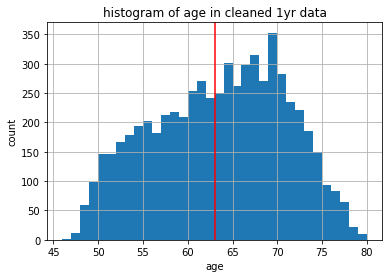

In [ ]:
df_1yr_fil['21003-2.0'].hist(bins=int(max(df_1yr_fil['21003-2.0']) - min(df_1yr_fil['21003-2.0'])))
  # make a bin for each integer age
plt.title('histogram of age in cleaned 1yr data')
plt.axvline(x=np.mean(df_1yr_fil['21003-2.0']), color = "red")
plt.xlabel('age')
plt.ylabel('count')

# look into into sex after all cleaning

age has the feature ID `31-0.0`

## 1 year data

In [ ]:
df_1yr_fil['31-0.0'].isnull().sum()
# our sex columns contains missing values

0

Text(0, 0.5, 'count')

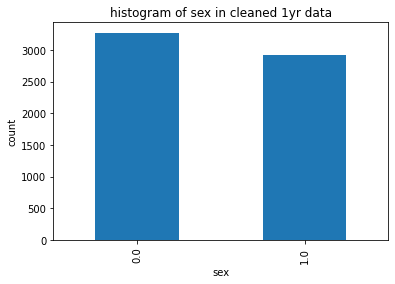

In [ ]:
df_1yr_fil['31-0.0'].value_counts().plot(kind='bar')
plt.title('histogram of sex in cleaned 1yr data')
# plt.axvline(x=np.mean(df_1yr_fil['21003-2.0']), color = "red")
plt.xlabel('sex')
plt.ylabel('count')